In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder

In [33]:
#feature engineering

df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [34]:
df["tipnorm"]=df["tip"]/df["total_bill"]
df.head()

,total_bill,tip,sex,smoker,day,time,size,tipnorm
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [35]:
dftitanic=pd.read_csv("/Users/chenyenpin/Desktop/titanic.csv", index_col="PassengerId")
dftitanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
dftitanic["personaltitle"]=dftitanic.Name.str.extract('.+?,(.+?)\.', expand=False)
dftitanic.dtypes



Survived           int64
Pclass             int64
Name              object
Sex               object
Age              float64
SibSp              int64
Parch              int64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
personaltitle     object
dtype: object

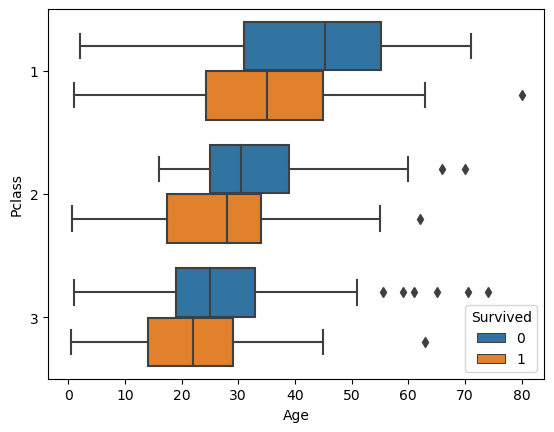

In [37]:
#observando os features com o TARGER usando boxplot
sns.boxplot(data=dftitanic, y= "Pclass", x="Age", orient="h", hue="Survived");

In [38]:
#observacao correlacao linear

In [39]:
dftitanic.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personaltitle
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,Mr


In [40]:
df_model=dftitanic.drop(columns=["Name","Ticket","Cabin" ]).dropna()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personaltitle
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [41]:
target=df_model["Survived"]
features=df_model.drop(columns="Survived")

In [42]:
target

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
886    0
887    0
888    1
890    1
891    0
Name: Survived, Length: 712, dtype: int64

In [43]:
#selecionando as colunas categoricas

cat_feature=features.select_dtypes(exclude="number").columns
cat_feature



Index(['Sex', 'Embarked', 'personaltitle'], dtype='object')

In [44]:
encoder=OrdinalEncoder()
features[cat_feature]=encoder.fit_transform(features[cat_feature]).astype(int)
features

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personaltitle
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,11
2,1,0,38.0,1,0,71.2833,0,12
3,3,0,26.0,0,0,7.9250,2,8
4,1,0,35.0,1,0,53.1000,2,12
5,3,1,35.0,0,0,8.0500,2,11
...,...,...,...,...,...,...,...,...
886,3,0,39.0,0,5,29.1250,1,12
887,2,1,27.0,0,0,13.0000,2,14
888,1,0,19.0,0,0,30.0000,2,8


In [47]:
discrete_features= features.dtypes==int
discrete_features

Pclass            True
Sex               True
Age              False
SibSp             True
Parch             True
Fare             False
Embarked          True
personaltitle     True
dtype: bool

In [50]:
scores=mutual_info_classif(X=features, y=target, discrete_features=discrete_features)

<AxesSubplot:>

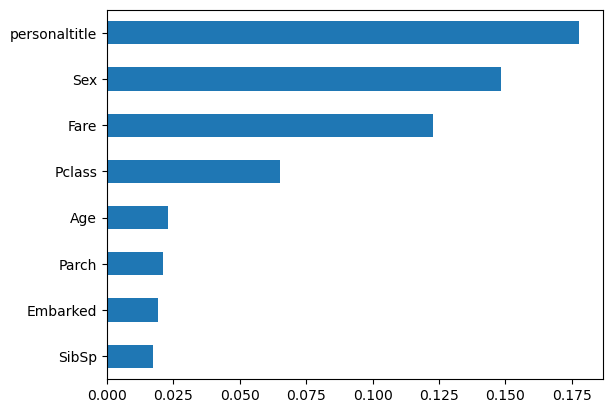

In [54]:
pd.Series(data=scores, index=features.columns).sort_values().plot.barh()